## Idriss Khattabi - IA&SD - TP SVM and Data Meteo12

In [1]:
# Import des bibliothèques nécessaires
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

## Importe data and apply K-Means to generate 'Target' Column

In [19]:
# import des données
data = pd.read_csv("DataMeteo12 Complet.csv")
data.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [20]:
cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for i in cols :
    data[i].fillna(data[i].mean(), inplace=True)

In [21]:
cols_for_drop = ["No","year", "month", "day", "hour", "wd", "station", 'RAIN', 'WSPM']
cleaned_data1 = data.drop(columns=cols_for_drop)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cleaned_data = scaler.fit_transform(cleaned_data1)

scaled_cleaned_data = pd.DataFrame(scaled_cleaned_data)
scaled_cleaned_data.columns = cleaned_data1.columns

In [23]:
kmeans = KMeans(n_clusters=4)

In [24]:
kmeans.fit(scaled_cleaned_data)

KMeans(n_clusters=4)

In [25]:
# get labels of clusters foer each data point
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
# add labels to the dataset
scaled_cleaned_data["labels"] = labels

---------------------

## Create SVM Module

In [10]:
X = scaled_cleaned_data.drop(columns=["labels"])
y = scaled_cleaned_data["labels"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = SVC(kernel='linear')

In [12]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
y_classify = model.predict(X_test)

In [14]:
accuracy = accuracy_score(y_classify, y_test)
print(f"accuracy_score : {accuracy}")

accuracy_score : 0.9964351917866818


<Axes: >

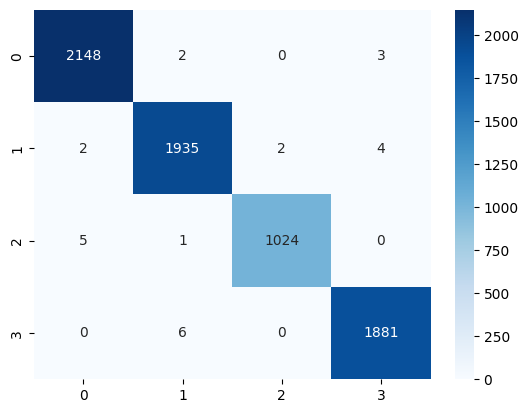

In [15]:
cm = confusion_matrix(y_classify, y_test)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues') 

In [16]:
print(classification_report(y_test, y_classify))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2155
           1       1.00      1.00      1.00      1944
           2       0.99      1.00      1.00      1026
           3       1.00      1.00      1.00      1888

    accuracy                           1.00      7013
   macro avg       1.00      1.00      1.00      7013
weighted avg       1.00      1.00      1.00      7013

